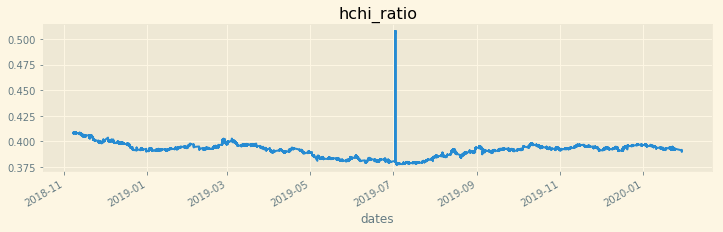

In [29]:
# import requests
import pandas as pd
# import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('Solarize_Light2')

df = pd.read_excel('../dataset/hchi_ratio.xlsx').set_index(['dates']).loc[:, 'HCHI']
# df.head()

# r = requests.get('https://datamarket.com/api/v1/list.json?ds=22ox')
# jobj = json.loads(r.text[18:-1])
# data = jobj[0]['data']
# df = pd.DataFrame(data, columns=['time','data']).set_index('time')
train = df.loc['2018-12-1':'2019-12-31']
test = df.loc['2020-1-1':'2020-1-31']
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
pred = test.copy()
df.plot(figsize=(12,3));
plt.title('hchi_ratio');

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, freq=4)

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.api import OLS

x, y = np.arange(len(decomposition.trend.dropna())), decomposition.trend.dropna()
x = sm.add_constant(x)
model = OLS(y, x)
res = model.fit()
print(res.summary())
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(decomposition.trend.dropna().values, label='trend')
ax[0].plot([res.params.x1*i + res.params.const for i in np.arange(len(decomposition.trend.dropna()))], label='regression')
ax[1].plot(res.resid.values, label='residuals')
ax[1].plot(np.abs(res.resid.values), label='absolute residuals')
ax[1].hlines(0, 0, len(res.resid), color='r')
ax[0].set_title("Trend and Regression")
ax[1].set_title("Residuals")
ax[0].legend()
ax[1].legend()

                            OLS Regression Results                            
Dep. Variable:                   HCHI   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     6006.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:53:16   Log-Likelihood:             8.7958e+05
No. Observations:              256857   AIC:                        -1.759e+06
Df Residuals:                  256855   BIC:                        -1.759e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3939   3.11e-05   1.27e+04      0.0